# Predicting Zomato Restaurants Rate

## 1. Problem Description
Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food.

Does demography of area matters? Does location of particular type of restraurant depends on people living in that area> Does theme of restraurant matters? Is food chain category restraurant likely to have more customers than its counter part? Are any neighbourhood on similar based on the type of food? Is particular neighbours is famous for itw own kind of food? If two neighbours are similar does that mean these are related or particular group of people live in neighbourhood or these are places to eat. What kind of food is famous in locality. Do entire locality loves veg food, if yes then locality populated by particular set of people eg Jain, Gujarati,Marwadi who are basically veg.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump,load
import ast 

In [2]:
d='D:\\PROJECTS\\Internship Project\\ITequid labs\\Zomato'

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('zomato.csv')

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Observation
1. Rate
2. dish_liked
3. phone
4. approx_cost for two people/entries values are missing.

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Column Description

1. url: contains the url of the restaurant in the zomato website
2. address: contains the address of the restaurant in Bengaluru
3. name: contains the name of the restaurant
4. online_order: whether online ordering is available in the restaurant or not
5. book_table: table book option available or not
6. rate: contains the overall rating of the restaurant out of 5
7. votes: contains total number of rating for the restaurant as of the above mentioned date
8. phone: contains the phone number of the restaurant
9. location: contains the neighborhood in which the restaurant is located
10. rest_type: restaurant type
11. dish_liked: dishes people liked in the restaurant
12. cuisines: food styles, separated by comma
13. approx_cost(for two people): contains the approximate cost for meal for two people
14. reviews_list: list of tuples containing reviews for the restaurant, each tuple
15. menu_item: contains list of menus available in the restaurant
16. listed_in(type): type of meal
17. listed_in(city): contains the neighborhood in which the restaurant is listed

In [9]:
data.votes.describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

### Column G Analysis
1. Minimum votes value is 0. 
    This can be interpreted as there are some restaurants which have 0 votes
2. Maximum votes value is 16832
    There is a restaurant which has 16832.
3. Average votes value is 284.

# Data Preprocessing

In [10]:
data.loc[:,['url','phone','name','location','address', 'listed_in(city)']]

,url,phone,name,location,address,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,080 42297555\r\n+91 9743772233,Jalsa,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,080 41714161,Spice Elephant,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,+91 9663487993,San Churro Cafe,Banashankari,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,+91 9620009302,Addhuri Udupi Bhojana,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari
4,https://www.zomato.com/bangalore/grand-village...,+91 8026612447\r\n+91 9901210005,Grand Village,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Banashankari
...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,080 40301477,Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,"Four Points by Sheraton Bengaluru, 43/3, White...",Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,+91 8197675843,Vinod Bar And Restaurant,Whitefield,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,NaN,Plunge - Sheraton Grand Bengaluru Whitefield H...,Whitefield,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,080 49652769,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Sheraton Grand Bengaluru Whitefield Hotel & Co...,Whitefield


##  Check point
- Here, we can see that 3 columns are representing same information, so just dropping column which are not important.
- we are going to keep the location column and drop the address and listed_in(city) columns.

In [11]:
drop_col=['url','phone','address', 'listed_in(city)']
data.drop(drop_col,axis=1,inplace=True)

- To remove the rows by index all we have to do is pass the index number or list of index numbers in case of multiple drops. to drop rows by index simply use this code: df. drop(index)
- axis=1 (or axis='columns') is vertical axis. To take it further, if you use pandas method drop, to remove columns or rows, if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset.

In [12]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars


In [13]:
data.duplicated().sum()

9809

In [14]:
# Removing Null Values
data.drop_duplicates(inplace=True)

In [15]:
# 51717(Base) - 9809 (duplicate)
data.shape

(41908, 13)

## Removing Duplicates

In [16]:
# df.isna().sum() returns the number of missing values in each column.
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            4252
votes                              0
location                          14
rest_type                        172
dish_liked                     20206
cuisines                          36
approx_cost(for two people)      253
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [17]:
data.shape[0] # Total Rows

41908

## Finding the total missing values in percentage


In [18]:
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

### Check point :

- We can oberve that 48% dish_liked is missing as well as 10% rate values are missing.
- If we drop everything out, we will lose more than 55% points.

In [19]:
# Rating Analysis
d=data.rate
d

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 41908, dtype: object

In [20]:
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
## Traversing through the ratings
d.value_counts()

3.9/5     1858
3.7/5     1711
3.8/5     1703
3.9 /5    1663
NEW       1593
          ... 
2.0 /5       6
2.2 /5       5
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

### Check Point
- There are some points which has 'NEW' rating and '-' rating.

In [22]:
import numpy as np

In [23]:
d=d.replace('NEW',np.nan)
d=d.replace('-',np.nan)

In [24]:
## After removing NEW and -
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
# Before
data['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 41908, dtype: object

In [26]:
## Removing /5 
data['rate']=d.str.replace(r'/5| /5', '')

In [27]:
# After
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 41908, dtype: object

## Cleaning Reviews

In [28]:
data.reviews_list.values[:5]

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

## Observation 
- If we look closely at the reviews_list data we can clearly see that it has rating values
- We could extract these values from reviews and take their mean to fill rate column

In [29]:
data.reviews_list.values[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

#### The ast. literal_eval method is one of the helper functions that helps traverse an abstract syntax tree. This function evaluates an expression node or a string consisting of a Python literal or container display.

In [30]:
ast.literal_eval(data.reviews_list.values[1])

[('Rated 4.0',
  'RATED\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.'),
 ('Rated 3.0',
  'RATED\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)'),
 ('Rated 3.0',
  'RATED\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.'),
 ('Rated 4.0',
  'RATED\n  I wa

In [31]:
%time data.reviews_list=data.reviews_list.apply(lambda x: ast.literal_eval(x))

Wall time: 19.9 s


### Extract the rate value out of a string inside tuple

In [32]:
data.reviews_list[0][0][0].split()[0]

'Rated'

In [33]:
def extract_features_from_review_list(x):

    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [34]:
data['rate_new']=data.reviews_list.apply(lambda x: extract_features_from_review_list(x))

In [35]:
data.loc[:,['rate','rate_new']].sample(10)

,rate,rate_new
48848,4.0,3.3
40482,4.5,4.0
29715,4.3,3.9
31245,4.6,4.4
9183,3.7,3.6
14079,3.6,3.4
28344,3.9,2.3
29649,4.2,4.0
9325,3.1,NaN
7844,3.2,NaN


In [36]:
# apply the changes
nan_index = data.query('rate != rate & rate_new == rate_new').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'rate_new']

In [37]:
nan_index

Int64Index([   72,    90,   110,   116,   138,   216,   232,   432,   463,
              472,
            ...
            51257, 51382, 51386, 51424, 51445, 51447, 51452, 51487, 51500,
            51586],
           dtype='int64', length=1053)

In [38]:
data.rate.isna().sum()

4861

## Inference 
- We have saved more than 1000 points.

In [39]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [40]:
data.shape

(36840, 14)

In [41]:
data.drop('rate_new',axis=1,inplace=True)

In [42]:
data.shape

(36840, 13)

In [43]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [44]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [45]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [46]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15269
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [47]:
## Remnaming attributes
data.rename(columns={'listed_in(type)':'type','approx_cost(for two people)':'cost'},inplace=True)

In [48]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet


In [49]:
data.rest_type.value_counts()

Quick Bites                   12006
Casual Dining                  8720
Cafe                           2982
Dessert Parlor                 1665
Delivery                       1486
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Bakery, Beverage Shop             1
Dessert Parlor, Food Court        1
Name: rest_type, Length: 88, dtype: int64

#### Value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

- Filling missing values of rest_type with the most occuring value

In [50]:
data.rest_type.fillna(value='Quick Bites',inplace=True)

In [51]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      15269
cuisines            0
cost                0
reviews_list        0
menu_item           0
type                0
dtype: int64

## Dish liked 
- column number k
- Converting all the Uppercase string to lowercase string.

In [52]:
#converting to lowercase
data.dish_liked=data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [53]:
data.dish_liked.head(5)

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
Name: dish_liked, dtype: object

In [54]:
sum(data.menu_item=='[]')

26078

In [55]:
data[data.dish_liked.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[(Rated 5.0, RATED\n Awesome food ??Great ser...",[],Buffet
19,360 Atoms Restaurant And Cafe,Yes,No,3.1,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[(Rated 5.0, RATED\n Friendly staffs , nice a...",[],Cafes
22,Cafe Coffee Day,No,No,3.6,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[(Rated 4.0, RATED\n This outlet is better th...",[],Cafes
24,Hide Out Cafe,No,No,3.7,31,Banashankari,Cafe,NaN,Cafe,300,"[(Rated 4.0, RATED\n The food was quite good,...",[],Cafes
25,CAFE NOVA,No,No,3.2,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[(Rated 1.0, RATED\n No ventilation. Smokers ...",[],Cafes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51680,Trinity Club Lounge,No,No,3.5,20,Whitefield,Lounge,NaN,Finger Food,"1,500","[(Rated 3.5, RATED\n Had a breakfast buffet h...",[],Drinks & nightlife
51706,Red Glow,No,No,3.7,27,Whitefield,Pub,NaN,"North Indian, Continental","1,200","[(Rated 5.0, RATED\n Excellent place had nice...",[],Pubs and bars
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars


In [56]:
data.reviews_list[0]

[('Rated 4.0',
  'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'),
 ('Rated 4.0',
  'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'),
 ('Rated 2.0',
  'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mos

## Check Point
- As we can see dishes liked or disliked are mentioned in reviews,
- If we can extract these dishes we can fill the nan values of dish_liked column
- we will start by getting a list of all the dishes available from our dataset

In [57]:
dish_list=[]
for i in list(data.index):
    if data.dish_liked[i]!='NaN' and isinstance(data.dish_liked[i],str):
        k=data['dish_liked'][i].split(',')
    dish_list.extend(k)
print(dish_list)

['pasta', ' lunch buffet', ' masala papad', ' paneer lajawab', ' tomato shorba', ' dum biryani', ' sweet corn soup', 'momos', ' lunch buffet', ' chocolate nirvana', ' thai green curry', ' paneer tikka', ' dum biryani', ' chicken biryani', 'churros', ' cannelloni', ' minestrone soup', ' hot chocolate', ' pink sauce pasta', ' salsa', ' veg supreme pizza', 'masala dosa', 'panipuri', ' gol gappe', 'onion rings', ' pasta', ' kadhai paneer', ' salads', ' salad', ' roti', ' jeera rice', 'onion rings', ' pasta', ' kadhai paneer', ' salads', ' salad', ' roti', ' jeera rice', 'farmhouse pizza', ' chocolate banana', ' virgin mojito', ' pasta', ' paneer tikka', ' lime soda', ' prawn pizza', 'pizza', ' mocktails', ' coffee', ' nachos', ' salad', ' pasta', ' sandwiches', 'waffles', ' pasta', ' coleslaw sandwich', ' choco waffle', ' tacos', ' momos', ' cheese nachos', 'waffles', ' pasta', ' crispy chicken', ' honey chilli chicken', ' sandwich', ' coffee', ' crepe', 'mocktails', ' peri fries', ' lasag

In [58]:
#Getting unique dishes
dish_list=set(dish_list) 

In [59]:
len(dish_list)

3507

In [60]:
p=data.reviews_list[0]
' '.join([i[1].replace('RATED\n ','') for i in p]).replace('\n','').replace('\S+','').replace('?','').replace('Ã','').replace('\\x','').strip().lower()

'a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.cheers  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this place is mostly visited by vegetarians. anyways we ordered ala carte items which took ages to come

In [61]:
# clear the text
def clear_text(t):
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [62]:
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [63]:
data['reviews_text']

0        a beautiful place to dine in the interiors tak...
1        had been here for dinner with family  turned o...
2        ambience is not that good enough and it's not ...
3        great food and proper karnataka style full mea...
4        very good restaurant in neighbourhood  buffet ...
                               ...                        
51709    ambience- big and spacious lawn was used to ho...
51711    a fine place to chill after office hours, reas...
51712    food and service are incomparably excellent  t...
51715    nice and friendly place and staff is awesome  ...
51716    great ambience , looking nice good selection o...
Name: reviews_text, Length: 36832, dtype: object

In [64]:
dish_list.intersection(data['reviews_text'][100].split())

{'rice', 'thali', 'vegetarian'}

In [65]:
data['dish_liked_new']=data.reviews_text.apply(lambda x: ', '.join(list(dish_list.intersection(x.split()))))

In [66]:
data['dish_liked_new']

0             breads, paratha, rice, chaap, chicken, halwa
1        roti, biryani, tikka, momos, rice, lassi, fish...
2        mocktails, pasta, lasagne, decor, nachos, pizz...
3                                   vegetarian, rice, roti
4                                          paratha, kulcha
                               ...                        
51709                                  fish, rice, chicken
51711                                 chicken, beer, tikka
51712                 cocktails, chicken, decor, mocktails
51715                                     pizza, mocktails
51716                                            mocktails
Name: dish_liked_new, Length: 36832, dtype: object

In [67]:
data.dish_liked_new.isna().sum()

0

In [68]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_liked_new']].sample(5,random_state=1)

,dish_liked,dish_liked_new
32901,NaN,"kheer, halwa"
44323,NaN,"tikka, rice, prawn, shawarma, chicken"
6479,NaN,
11046,NaN,rice
50112,NaN,"cappuccino, coffee"


### So, now we can replace this missed values from the dish_n_review

In [69]:
nan_index=data.query('dish_liked !=dish_liked & dish_liked_new==dish_liked_new').index

In [70]:
for i in nan_index:
    data.loc[i,'dish_liked']=data.loc[i,'dish_liked_new'] 

In [71]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'reviews_text', 'dish_liked_new'],
      dtype='object')

In [72]:
data.drop(['dish_liked_new','reviews_text'],axis=1,inplace=True)

In [73]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","fish, rice, chicken","North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"cocktails, chicken, decor, mocktails",Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [74]:
data.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
dtype: int64

In [75]:
data.shape

(36832, 13)

# Data Visualization

### How many Restaurant accepting online orders?

In [76]:
oo=data.online_order.value_counts()

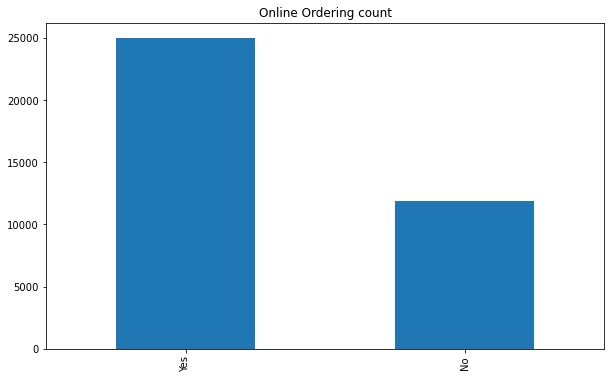

Yes    24969
No     11863
Name: online_order, dtype: int64

In [77]:
plt.figure(figsize=(10,6))
oo.plot(kind='bar')
plt.title('Online Ordering count')
plt.show()
oo

## Ratings

In [78]:
data.rate=data.rate.astype('float')

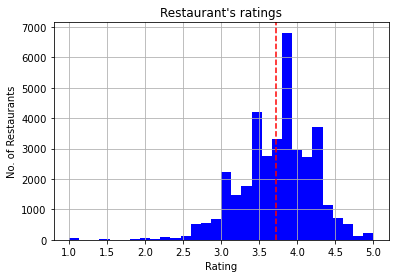

3.7208921589921835


In [79]:
data.rate.hist(color='blue',bins=30)
plt.axvline(x=data.rate.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(data.rate.mean())

## Table Booking Facility

In [80]:
data.book_table.value_counts

<bound method IndexOpsMixin.value_counts of 0        Yes
1         No
2         No
3         No
4         No
        ... 
51709     No
51711     No
51712     No
51715    Yes
51716     No
Name: book_table, Length: 36832, dtype: object>

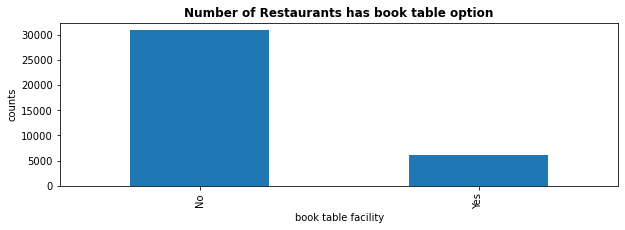

In [81]:
plt.figure(figsize=(10,3))
ax =data.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')                             
plt.show()

## Number of Restaurants in each location (Bengalore)

In [82]:
data.location.value_counts()

BTM                      3161
Koramangala 5th Block    2056
HSR                      1807
Indiranagar              1793
Whitefield               1616
                         ... 
West Bangalore              4
Yelahanka                   4
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

- As we can see there are total 92 different locations in Bangalore.

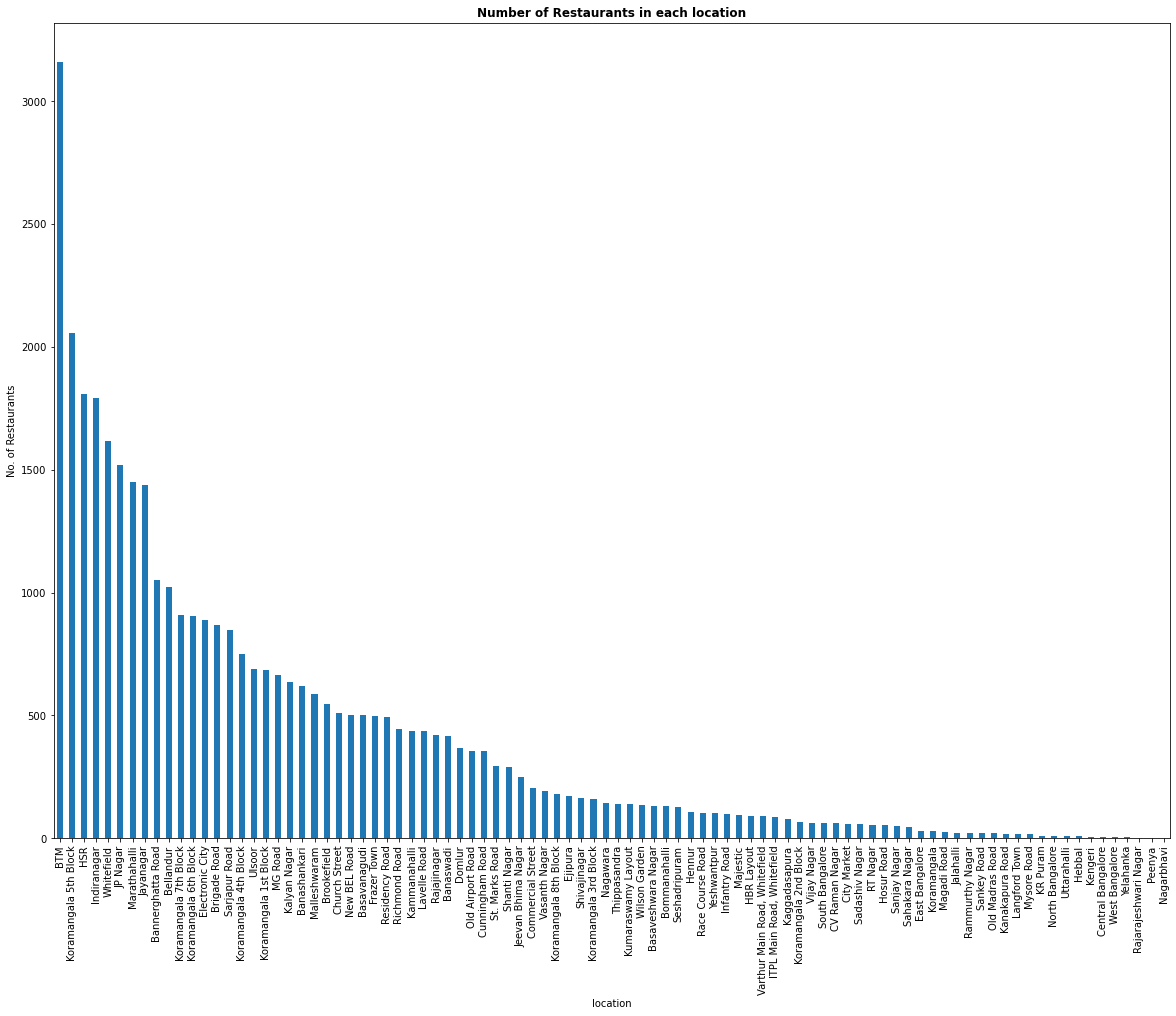

In [83]:
plt.figure(figsize=(20,15))
ax =data.location.value_counts().plot(kind='bar')
plt.title('Number of Restaurants in each location', weight='bold')
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

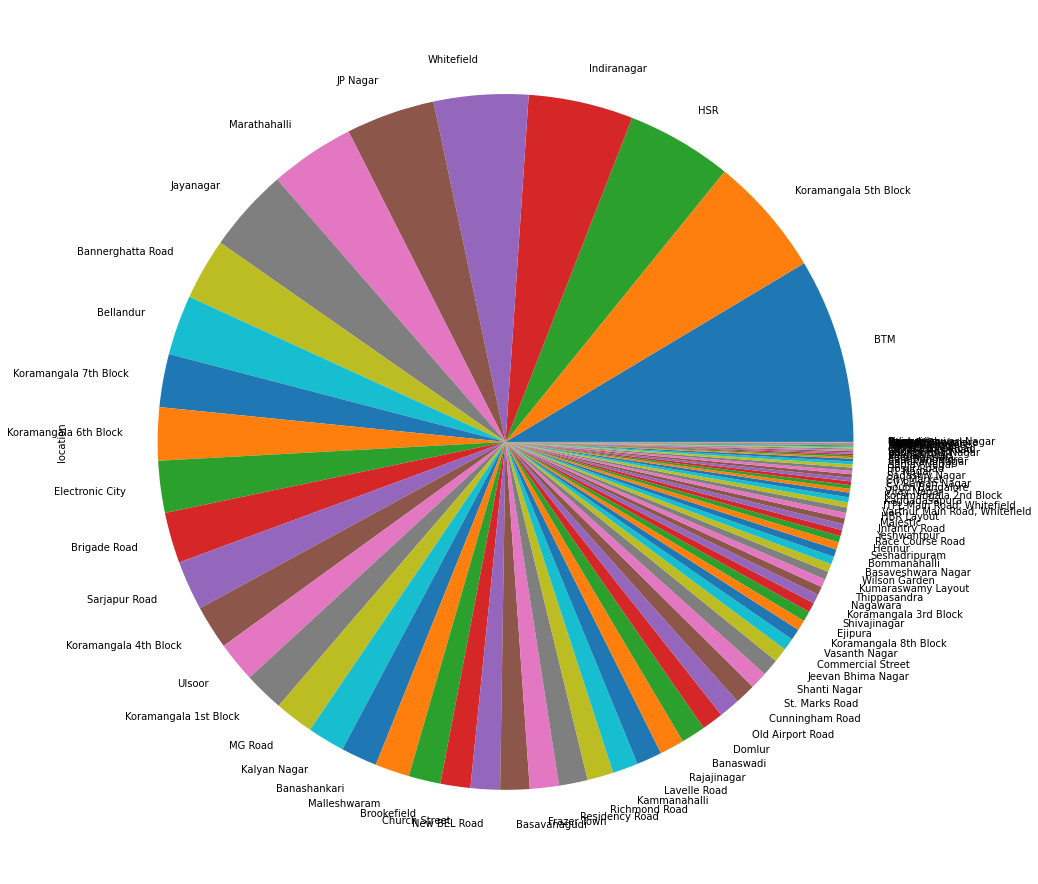

In [84]:
#plotting pie chart
plt.figure(figsize=(20,16))
ax=data.location.value_counts().plot(kind='pie')
plt.show()

- Due to huge size and complexity...
- limitting to TOP 10 hotspots

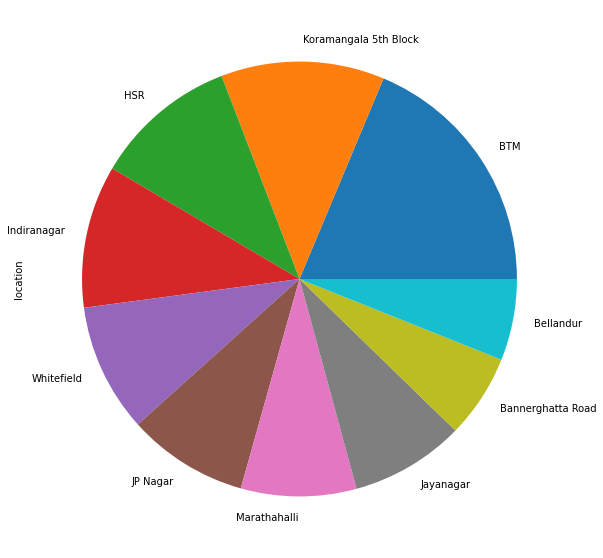

In [85]:
plt.figure(figsize=(15,10))
ax=data.location.value_counts()[:10].plot(kind='pie')
plt.show()

## Inference
- We can see that most of the restaurants are located at the BTM location

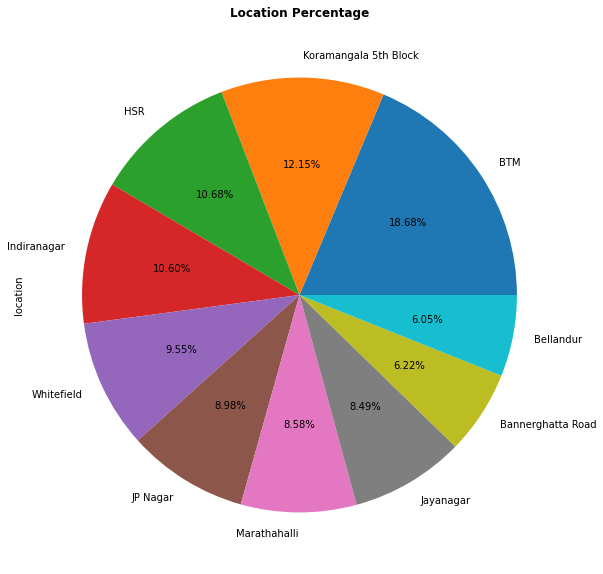

In [86]:
plt.figure(figsize=(15,10))
ax=data.location.value_counts()[:10].plot(kind='pie',autopct='%1.2f%%')
plt.title('Location Percentage', weight='bold')
plt.show()

## Top 20 restaurants by name

In [87]:
top_20=data.name.value_counts()[:20]

In [88]:
top_20=data.name.value_counts()[:20]

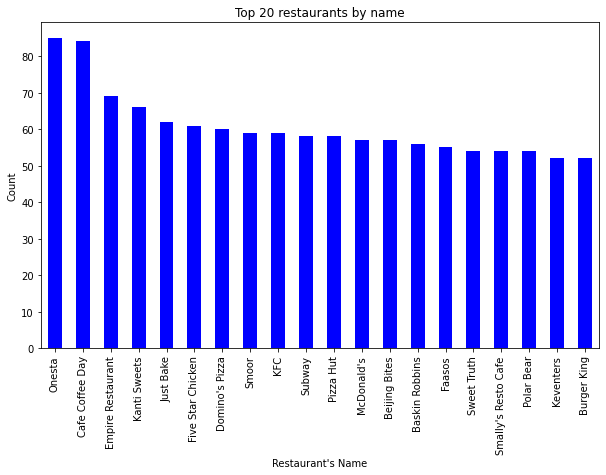

In [89]:
plt.figure(figsize=(10,6))
ax=top_20.plot(kind='bar',color='blue')
plt.title('Top 20 restaurants by name')
plt.xlabel("Restaurant's Name")
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'counts')

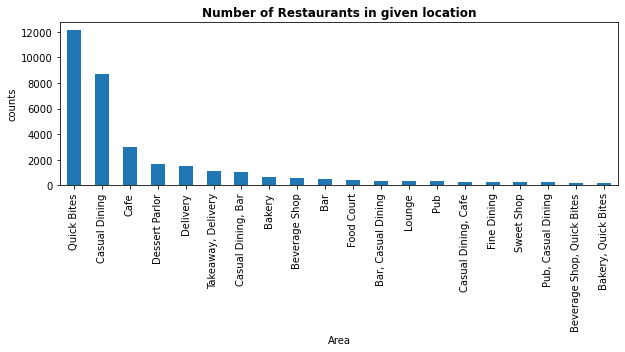

In [90]:
plt.figure(figsize=(10,3))
ax =data.rest_type.value_counts()[:20].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

### What is the Average cost in restaurants?

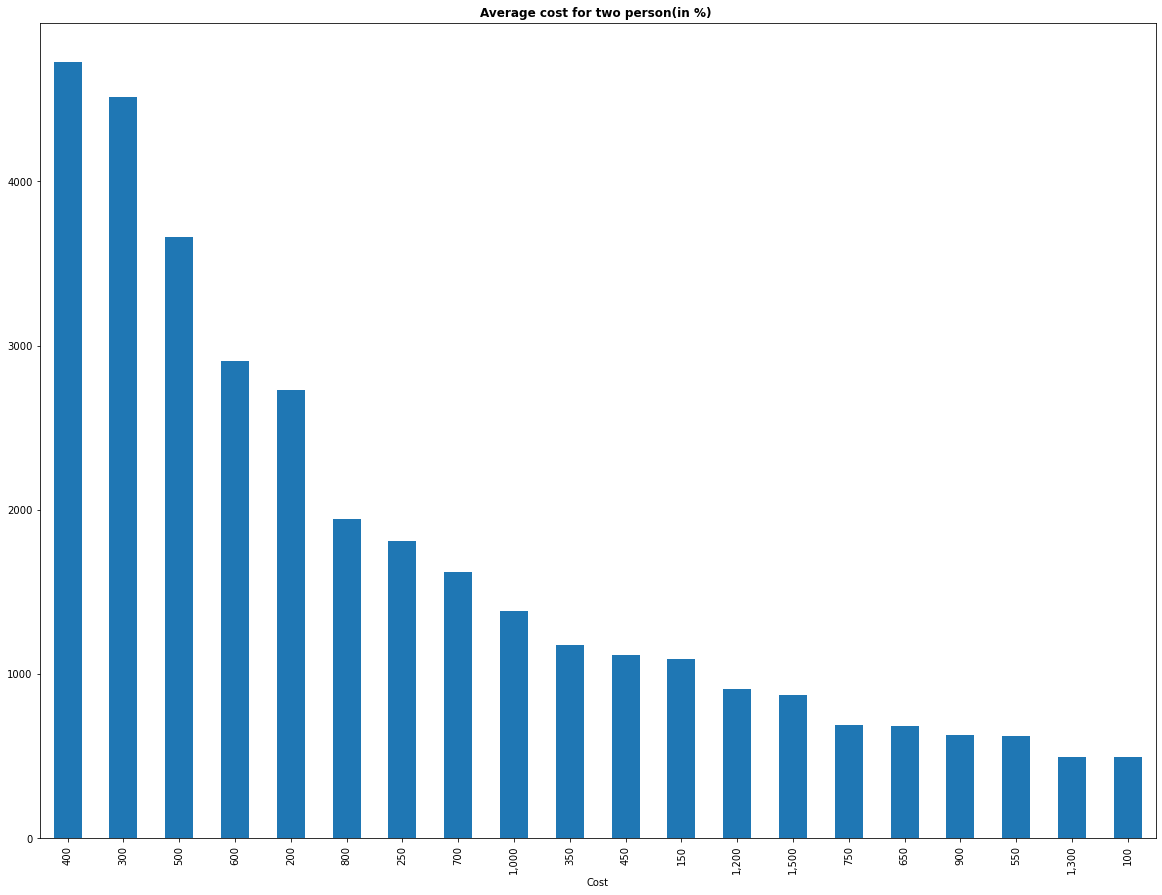

In [91]:
#plotting
plt.figure(figsize=(20,15))
ax =data.cost.value_counts()[:20].plot(kind='bar')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.show()

### Average cost for two person(in %)

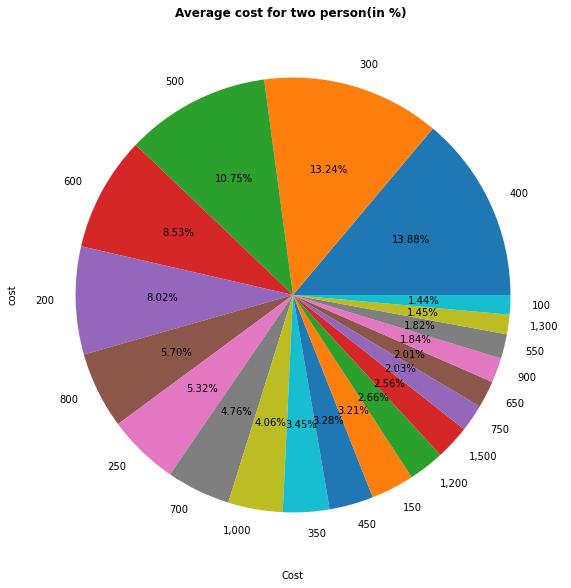

In [92]:
plt.figure(figsize=(15,10))
ax=data.cost.value_counts()[:20].plot(kind='pie',autopct='%1.2f%%')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.show()

#### Average cost for 2 is around 300-400 for 27% restaurants and below 500 for approx 52% restaurants

## Rate VS Restaurant Type graph

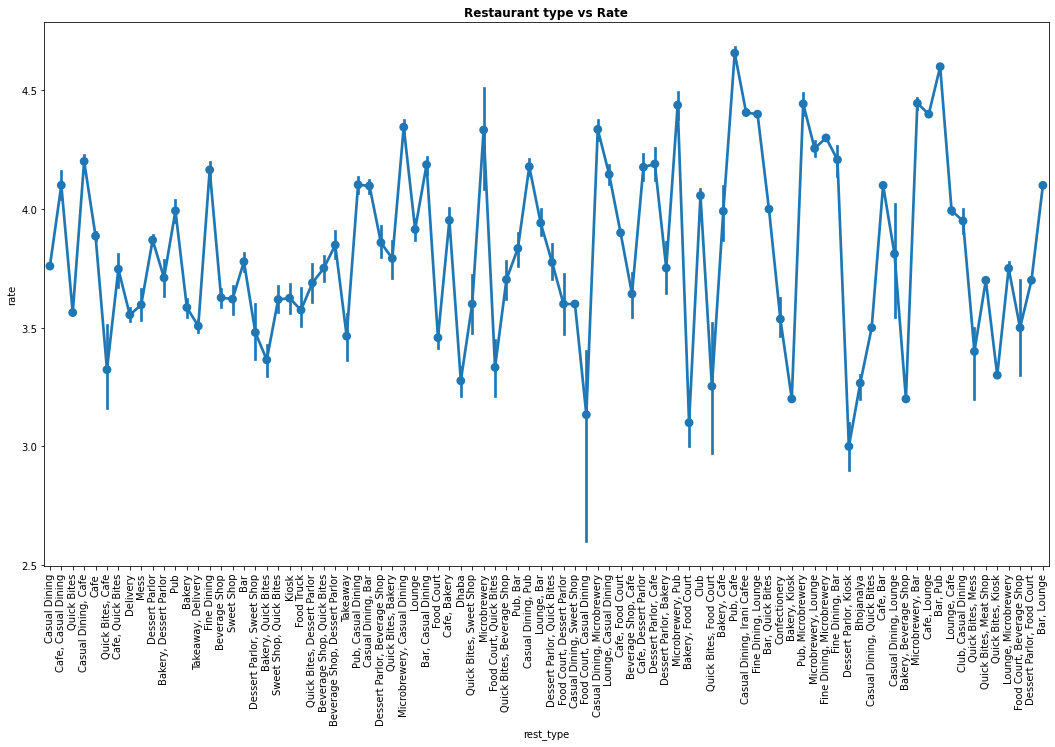

In [93]:
f,ax=plt.subplots(figsize=(18,10))
g=sns.pointplot(y='rate',x='rest_type',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

### Top 10 Cuisines in Bangalore

In [94]:
cuisines=[j.lower().strip() for i in data.cuisines for j in i.split(',')]

Text(0, 0.5, 'No of restaurants')

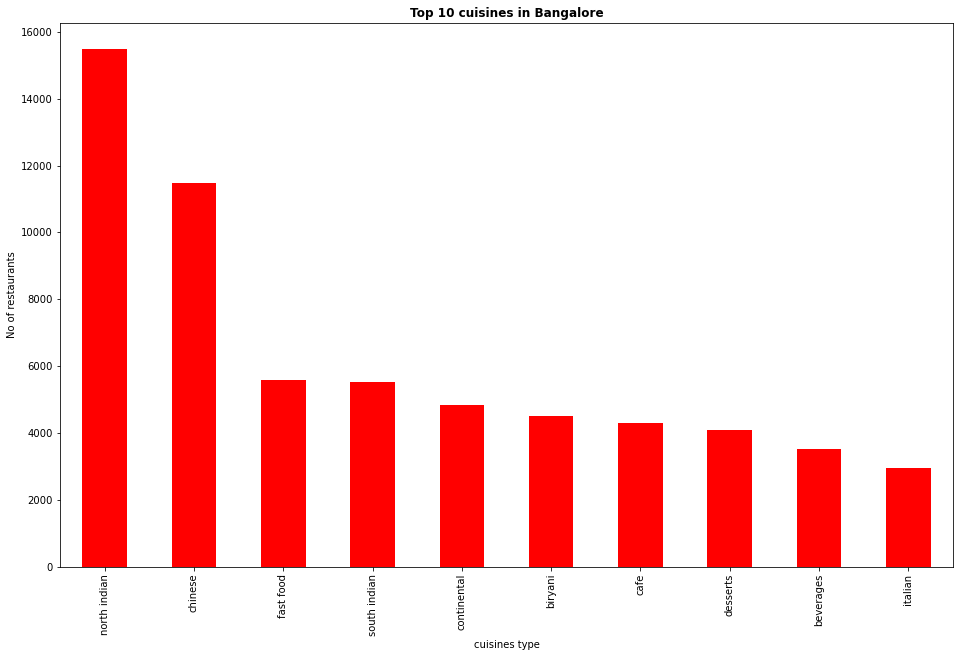

In [95]:
plt.figure(figsize=(16,10))
pd.Series(cuisines).value_counts()[:10].plot(kind='bar',color='r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

- North Indian food is at top, followed by chinese and so on.

# Machine Learning

In [96]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","fish, rice, chicken","North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"cocktails, chicken, decor, mocktails",Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [97]:
data['online_order']=pd.get_dummies(data.online_order,drop_first=True)
data['book_table']=pd.get_dummies(data.book_table,drop_first=True)

In [98]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar","fish, rice, chicken","North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,"cocktails, chicken, decor, mocktails",Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [99]:
data.rest_type=data.rest_type.str.replace(',','')
data.rest_type=data.rest_type.apply(lambda x: ' '.join(sorted(x.split())))

In [100]:
data.drop(columns=['dish_liked','reviews_list','menu_item','type'], inplace  =True)

In [101]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [102]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [103]:
data.rest_type

0             Casual Dining
1             Casual Dining
2        Cafe Casual Dining
3               Bites Quick
4             Casual Dining
                ...        
51709     Bar Casual Dining
51711     Bar Casual Dining
51712                   Bar
51715                   Bar
51716     Bar Casual Dining
Name: rest_type, Length: 36832, dtype: object

In [104]:
data['cuisines']=data.cuisines.str.replace(',','')
data['cuisines']=data.cuisines.astype(str).apply(lambda x:' '.join(sorted(x.split())))

In [105]:
data.cost.value_counts()

400      4730
300      4514
500      3664
600      2907
200      2732
         ... 
199         2
3,700       1
5,000       1
70          1
80          1
Name: cost, Length: 63, dtype: int64

In [106]:
data['cost']=data.cost.str.replace(',','')
data.cost=data.cost.astype('int')

In [107]:
x = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [108]:
x.shape,y.shape

((36832, 7), (36832,))

## Splitting the data for Model Building

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [110]:
from joblib import dump,load

dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [111]:
X_train = load('more_feature_X_train')
X_test = load('more_feature_X_test')
y_train = load('more_feature_y_train')
y_test = load('more_feature_y_test')

In [112]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [113]:
#Avoid data leakage
def onehot_fit_transform(df,col):
  out=df[col].values.reshape(-1,1)
  return encoder.fit_transform(out).toarray()

def onehot__transform(df,col):
  out=df[col].values.reshape(-1,1)
  return encoder.transform(out).toarray() 

In [114]:
# one hot encoding apply to 'rest_type' features on train/test dataset
train_loc_feature=onehot_fit_transform(X_train,'location')
test_loc_feature=onehot__transform(X_test,'location')

train_type_feature=onehot_fit_transform(X_train,'rest_type')
test_type_feature=onehot__transform(X_test,'rest_type')

train_cuisines_feature=onehot_fit_transform(X_train,'cuisines')
test_cuisines_feature=onehot__transform(X_test,'cuisines')

In [115]:
print(train_loc_feature.shape)
print(test_loc_feature.shape)

(25782, 92)
(11050, 92)


In [116]:
print(train_cuisines_feature.shape)
print(test_cuisines_feature.shape)

(25782, 1678)
(11050, 1678)


In [117]:
print(train_type_feature.shape)
print(test_type_feature.shape)

(25782, 65)
(11050, 65)


In [118]:
from scipy.sparse import hstack
## combine all 'one-hot' encoded features as Tr.
tr=pd.DataFrame(pd.np.column_stack([train_loc_feature,train_cuisines_feature,train_type_feature]))

In [119]:
## CONCAT both dataframe ### ie Tr and X_train(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows
l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(25782, 1842)

In [120]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([test_loc_feature, test_cuisines_feature,test_type_feature]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(11050, 1842)

In [121]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [122]:
# checking final train set shape
X_train.shape, y_train.shape

((25782, 1839), (25782,))

In [123]:
dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [124]:
X_train= load('more_feature_X_train') 
X_test= load('more_feature_X_test')
y_train= load('more_feature_y_train')
y_test= load('more_feature_y_test')

In [125]:
def imp_df(column_names,importances):
  df=pd.DataFrame({ 
      'features':column_names,
      'features_importances':importances
  }).sort_values('features_importances',ascending=False).reset_index(drop=True)
  return df
# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df,title):
  sns.barplot(x='features_importances',y='features',data=imp_df,color='royalblue',orient='h').set_title(title,fontsize=20)

## Model -1 Linear Regression

In [126]:
from sklearn.metrics import mean_squared_error as mse

In [127]:
X_train

,online_order,book_table,votes,cost,0,1,2,3,4,5,...,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834
0,1,0,1731,1400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,16,550,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,181,400,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,298,1200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,496,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25777,0,1,469,3000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25778,1,0,94,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25779,1,0,658,750,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25780,1,0,457,500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
# Instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
y_pred=lm2.predict(X_test)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

3.4002762979260055
[ 9.24123040e-02  2.28416424e-01  1.23419673e-04 ...  3.43856558e-02
  7.98693675e-02 -4.90131845e-02]


In [129]:
from sklearn.metrics import r2_score
a=r2_score(y_test,y_pred)

In [130]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23689801445366318
0.12461115371517352
0.3530030505748832


In [132]:
predictions = lm2.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [3.84729105 3.68957192 3.34571912 ... 3.97695784 3.53371604 4.28525752]
Actual labels:     24008    3.8
6816     4.2
948      3.1
9048     4.1
35049    3.7
        ... 
23895    3.8
44714    4.2
6538     4.2
7473     3.0
42856    4.5
Name: rate, Length: 11050, dtype: float64


In [133]:
#feature Importance
lm2=imp_df(X_train.columns,lm2.coef_)
lm2.head(10)

,features,features_importances
0,777,1.555001
1,1394,1.540394
2,342,1.479393
3,1080,1.356666
4,1302,1.347041
5,280,1.339778
6,1031,1.142749
7,241,1.086981
8,506,1.017633
9,1408,0.996866


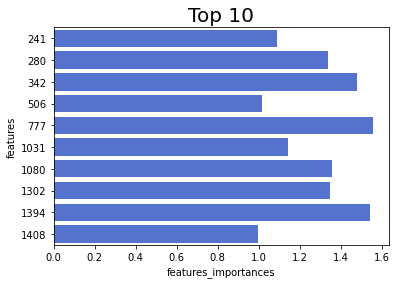

In [134]:
var_imp_plot(lm2[:10],'Top 10')

In [135]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred })
Randpred

,actual,pred
24008,3.8,3.847291
6816,4.2,3.689572
948,3.1,3.345719
9048,4.1,4.120140
35049,3.7,3.345901
...,...,...
23895,3.8,3.829350
44714,4.2,4.200555
6538,4.2,3.976958
7473,3.0,3.533716


In [136]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4662323649293568

<function matplotlib.pyplot.show(close=None, block=None)>

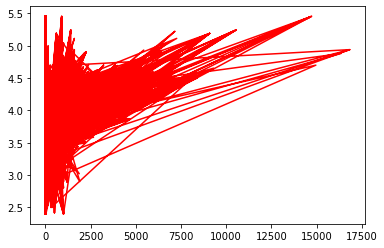

In [158]:
#Plot
import matplotlib.pyplot as plt
plt.plot(X_test,y_pred,c = 'r')
plt.show

## SGD Model

In [138]:
!pip install scikit-learn

In [139]:
from sklearn import linear_model
sgd_regression=linear_model.SGDRegressor()
sgd_regression.fit(X_train,y_train)
y_pred_sgd=sgd_regression.predict(X_test)


In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred_sgd)

## Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf_regression=RandomForestRegressor()
rf_regression.fit(X_train,y_train)
y_pred_rf=rf_regression.predict(X_test)

In [142]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

0.07271691381223527
0.03048392338733457
0.17459645869070362


In [146]:
from sklearn.metrics import r2_score
b= r2_score(y_test,y_pred_rf)
b

0.8694231518687003

In [147]:
rf1=imp_df(X_train.columns,rf_regression.feature_importances_)
rf1.head(10)

,features,features_importances
0,votes,0.395824
1,cost,0.068837
2,book_table,0.017052
3,1819,0.014432
4,online_order,0.012890
5,1690,0.012592
6,1337,0.012143
7,0,0.008951
8,1796,0.008786
9,1798,0.008632


In [148]:
rf2=imp_df(X_train.columns,rf_regression.feature_importances_)
rf2[:10]

,features,features_importances
0,votes,0.395824
1,cost,0.068837
2,book_table,0.017052
3,1819,0.014432
4,online_order,0.012890
5,1690,0.012592
6,1337,0.012143
7,0,0.008951
8,1796,0.008786
9,1798,0.008632


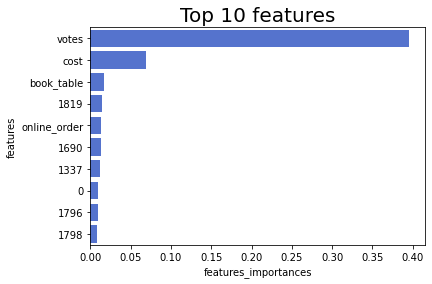

In [149]:
var_imp_plot(rf2[:10],'Top 10 features')